In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle as pkl

In [4]:
with open("german_df.pkl","rb") as f:
    ebay_cars = pkl.load(f)

In [5]:
df=ebay_cars.copy()

In [6]:
df['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [7]:
df=df[(df['yearOfRegistration']>=1920) & (df['yearOfRegistration']<=2020)]

In [9]:
df['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 2016,
       2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994, 1991,
       1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985, 1989,
       2015, 1968, 1982, 1976, 1983, 1959, 1973, 1969, 1971, 1987, 1986,
       1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972,
       1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936, 1954, 1958,
       1956, 1933, 1941, 1962, 1929, 1951, 1957, 1940, 1949, 2019, 1953,
       1935, 1950, 1948, 1952, 1932, 1927, 1923, 1931, 1942, 1930, 1944,
       1943, 1947, 1934, 1938, 1928, 1939, 1920, 1946], dtype=int64)

## Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot?

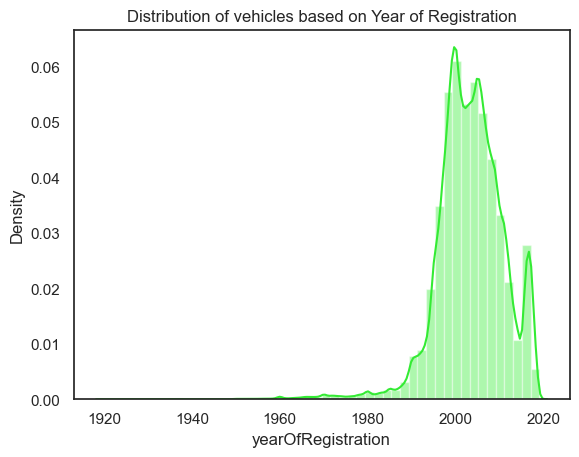

In [11]:
sns.distplot(df['yearOfRegistration'], color='#34eb34', kde=True)
plt.title("Distribution of vehicles based on Year of Registration")
plt.show()

In [24]:
# Mean of the prices of all the vehicle types
_median = df.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

# Calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other          5100.000
andere         8434.000
bus           13948.500
cabrio        21400.000
coupe         24300.000
kleinwagen     5775.000
kombi         13076.500
limousine     12801.500
suv           28807.125
Name: price, dtype: float64

In [13]:
# Removing the outliers as per the logic above
df = df[((df["vehicleType"] == "Other") & (df["price"] <=  5100)) |
        ((df["vehicleType"] == "andere") & (df["price"] <= 8434)) |
        ((df["vehicleType"] == "bus") & (df["price"] <=  13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <=  12801)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28807))]

## Create a plot based on the Variation of the price range by the vehicle type

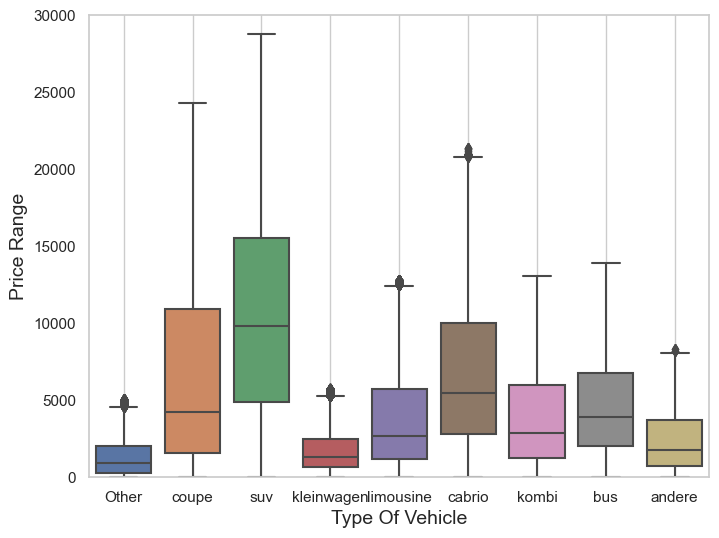

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType",y='price' ,data=df)
plt.ylim(0,30001)
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.grid()
plt.show()

## Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

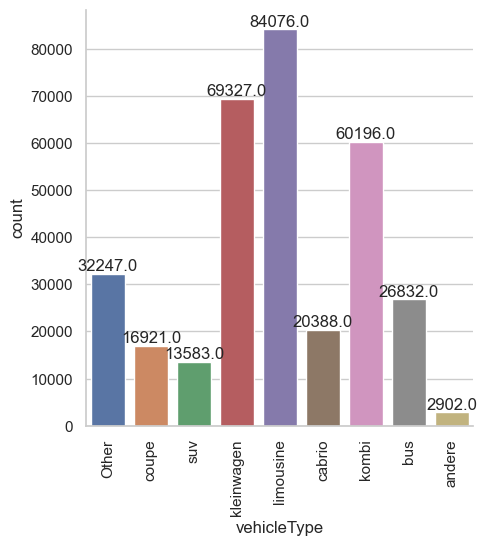

In [28]:
g = sns.catplot(x="vehicleType", data=df, kind="count")
g.set_xticklabels(rotation=90)

# Add data labels above each bar in each facet
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 10,  # Adjust offset as needed
            height,
            ha="center",
            va="bottom",
        )

plt.show()


In [61]:
df

,name,seller,model,brand,offerType,price,yearOfRegistration,monthOfRegistration,vehicleType,gearbox,fuelType,kilometer,notRepairedDamage,abtest,powerPS,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf31.6,private,golf,volkswagen,Offer,480,1993,Jan,Other,manual,petrol,150000,other,test,0,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5Sportback2.7Tdi,private,Other,audi,Offer,18300,2011,May,coupe,manual,diesel,125000,yes,test,190,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"JeepGrandCherokee""Overland""",private,grand,jeep,Offer,9800,2004,Aug,suv,automatic,diesel,125000,other,test,163,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF4143TÜRER,private,golf,volkswagen,Offer,1500,2001,Jun,kleinwagen,manual,petrol,150000,no,test,75,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,SkodaFabia1.4TDIPDClassic,private,fabia,skoda,Offer,3600,2008,Jul,kleinwagen,manual,diesel,90000,no,test,69,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,MitsubishiCold,private,colt,mitsubishi,Offer,0,2005,Jul,Other,manual,petrol,150000,yes,control,0,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suchet4vitoab6sitze,private,Other,sonstigeautos,Offer,2200,2005,Jan,Other,Unspecified,other,20000,other,test,0,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smartsmartleistungssteigerung100ps,private,fortwo,smart,Offer,1199,2000,Mar,cabrio,automatic,petrol,125000,no,test,101,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,VolkswagenMultivanT4TDI7DCUY2,private,transporter,volkswagen,Offer,9200,1996,Mar,bus,manual,diesel,150000,no,test,102,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


### Converting price from euros to dollars

In [21]:
df['price']=df['price'].apply(lambda x:x*1.10)

In [22]:
df.rename(columns={'price':'dollar_price'},inplace=True)

In [23]:
df['dollar_price']=df['dollar_price'].astype(int)

## Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

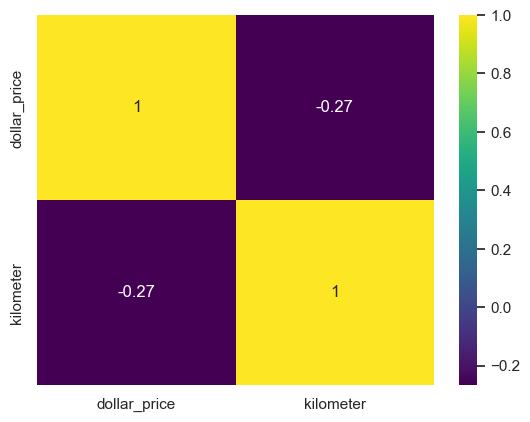

In [26]:
sns.heatmap(df[['dollar_price','kilometer']].corr(),  cmap='viridis', annot=True)
plt.show()

In [32]:
import pickle as pkl

In [34]:
with open('cleaned_df.pkl','wb') as f:
    pkl.dump(df,f) ## Dumping the updated dataframe into a new pickle file

In [35]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f) ## Loading data from cleaned_df.pkl

In [36]:
df=cleaned_autos.copy()

In [37]:
df

,name,seller,model,brand,offerType,dollar_price,yearOfRegistration,monthOfRegistration,vehicleType,gearbox,fuelType,kilometer,notRepairedDamage,abtest,powerPS,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf31.6,private,golf,volkswagen,Offer,528,1993,Jan,Other,manual,petrol,150000,other,test,0,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5Sportback2.7Tdi,private,Other,audi,Offer,20130,2011,May,coupe,manual,diesel,125000,yes,test,190,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"JeepGrandCherokee""Overland""",private,grand,jeep,Offer,10780,2004,Aug,suv,automatic,diesel,125000,other,test,163,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF4143TÜRER,private,golf,volkswagen,Offer,1650,2001,Jun,kleinwagen,manual,petrol,150000,no,test,75,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,SkodaFabia1.4TDIPDClassic,private,fabia,skoda,Offer,3960,2008,Jul,kleinwagen,manual,diesel,90000,no,test,69,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,MitsubishiCold,private,colt,mitsubishi,Offer,0,2005,Jul,Other,manual,petrol,150000,yes,control,0,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suchet4vitoab6sitze,private,Other,sonstigeautos,Offer,2420,2005,Jan,Other,Unspecified,other,20000,other,test,0,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smartsmartleistungssteigerung100ps,private,fortwo,smart,Offer,1318,2000,Mar,cabrio,automatic,petrol,125000,no,test,101,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,VolkswagenMultivanT4TDI7DCUY2,private,transporter,volkswagen,Offer,10120,1996,Mar,bus,manual,diesel,150000,no,test,102,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26
